In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [79]:
def knn(image,k):
    # Read in the image
    #image = cv2.imread('image.jpg')

    # Change color to RGB (from BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.imshow(image)

    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))

    # Convert to float type
    pixel_vals = np.float32(pixel_vals)

    #the below line of code defines the criteria for the algorithm to stop running,
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # then perform k-means clustering wit h number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    #k = 2
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))

    return segmented_image

    #plt.imshow(segmented_image)

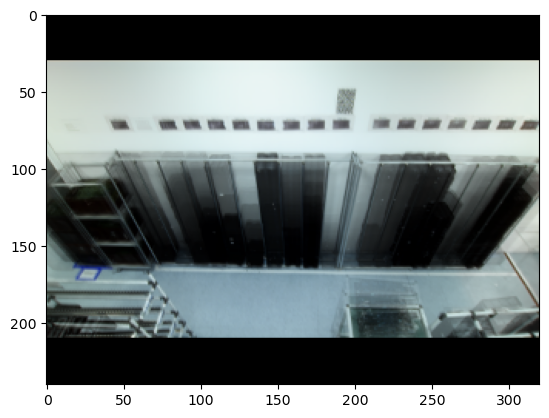

In [80]:
#load all images from the folder mdsn_no_p/input
# and calculate the average of all images
#then show it
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

path = 'mdsn_no_p/input'
images = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    if img is not None:
        images.append(img)

average = np.average(images, axis=0)
average = np.uint8(average)
plt.imshow(average)

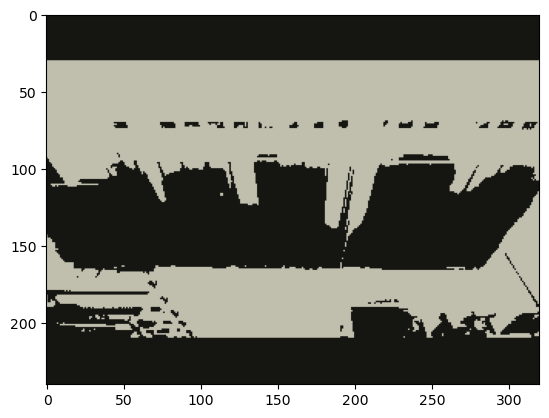

In [81]:
k=2
plt.imshow(knn(average,k))

In [82]:
#load cumulative_sum.png

cumulative_sum = cv2.imread('cumulative_sum.png')

In [83]:
# Load the image
image = average

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply connected component labeling to the image
_, labels = cv2.connectedComponents(gray)

# Create a blank image to store the binary images
binary_images = np.zeros((image.shape[0], image.shape[1], labels.max()+1), dtype=np.uint8)

# Iterate over each label and create a binary image for each
for label in range(1, labels.max()+1):
    binary_images[:,:,label] = (labels == label).astype(np.uint8) * 255

# Save the binary images
for label in range(binary_images.shape[2]):
    cv2.imwrite("binary_image_{}.jpg".format(label), binary_images[:,:,label])

#NEW CODE

In [ ]:
section = cv2.imread("binary_image/binary_image_1.jpg")
cumulative_sum = cv2.imread('cumulative_sum.png')

ret, section_binary = cv2.threshold(section, val_threshold_bin, 255, cv2.THRESH_BINARY)
ret, cumulative_sum_binary = cv2.threshold(cumulative_sum, val_threshold_bin, 255, cv2.THRESH_BINARY)

plt.figure(1)
plt.title('section')
plt.imshow(section_binary)
plt.figure(2)
plt.title('cumulative')
plt.imshow(cumulative_sum_binary)

result = cv2.bitwise_and(cumulative_sum_binary, section_binary)

plt.figure(3)
plt.title('result')
plt.imshow(result)

In [ ]:
teste = cv2.imread("binary_image/binary_image_0.jpg")
cumulative_sum = cv2.imread('cumulative_sum.png')

ret, teste_binary = cv2.threshold(teste, val_threshold_bin, 255, cv2.THRESH_BINARY)
ret, cumulative_sum_binary = cv2.threshold(cumulative_sum, val_threshold_bin, 255, cv2.THRESH_BINARY)

plt.figure(1)
plt.imshow(teste_binary)
plt.figure(2)
plt.imshow(cumulative_sum_binary)

result = cv2.bitwise_and(cumulative_sum_binary, teste_binary)

plt.figure(3)
plt.imshow(result)

#Working code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

k=2

In [2]:
import cv2

# Load the image
image = cv2.imread("image.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.imshow(image)

    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

    # Convert to float type
pixel_vals = np.float32(pixel_vals)

    #the below line of code defines the criteria for the algorithm to stop running,
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
    #becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # then perform k-means clustering wit h number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    #k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels into the same shape as the original image
labels = labels.reshape(image.shape[0], image.shape[1])

# Create a blank image to store the binary images
binary_images = np.zeros((image.shape[0], image.shape[1], k), dtype=np.uint8)

# Iterate over each cluster and create a binary image for each
for cluster in range(k):
    binary_images[:,:,cluster] = (labels == cluster).astype(np.uint8) * 255

# Save the binary images
for cluster in range(binary_images.shape[2]):
    cv2.imwrite("binary_image/binary_image_{}.jpg".format(cluster), binary_images[:,:,cluster])


In [3]:
val_threshold_bin = 200

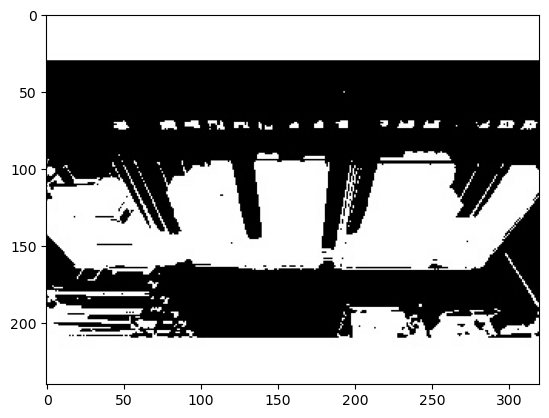

In [4]:
cumulative_sum = cv2.imread('cumulative_sum.png')
ret, cumulative_sum_binary = cv2.threshold(cumulative_sum, val_threshold_bin, 255, cv2.THRESH_BINARY)
#all black image with same size as cumulative_sum
best_image = np.zeros(cumulative_sum.shape, np.uint8)
best_image_count = cv2.countNonZero(cv2.cvtColor(best_image, cv2.COLOR_BGR2GRAY))

#for image in folder binary_image
#return the name of which image has more white pixels
for image in os.listdir('binary_image'):
    #load image
    img = cv2.imread(os.path.join('binary_image',image))
    #convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #apply threshold
    ret, section_binary = cv2.threshold(img, val_threshold_bin, 255, cv2.THRESH_BINARY)
    #apply bitwise_and
    result = cv2.bitwise_and(cumulative_sum_binary, section_binary)
    #count white pixels
    count = cv2.countNonZero(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))
    #if count is greater than best_image_count
    #best_image_count = count
    #best_image = image
    if count > best_image_count:
        best_image_count = count
        best_image = img

plt.imshow(best_image)

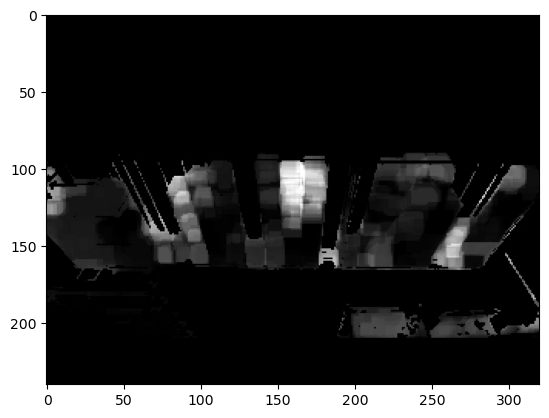

In [5]:
best_image_with_mask = cv2.bitwise_and(cumulative_sum, best_image)
plt.imshow(best_image_with_mask)